In [2]:
# Created on Feb 2020
# Author: 임일

import numpy as np
import pandas as pd

# 필요한 Surprise 알고리즘 불러오기
from surprise import BaselineOnly 
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [3]:
# MovieLens 100K 데이터 불러오기
data = Dataset.load_builtin('ml-100k')

# Train/Test 분리 
trainset, testset = train_test_split(data, test_size=0.25)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] 

 y


Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\user/.surprise_data/ml-100k


In [9]:
# 알고리즘 비교
algorithms = [BaselineOnly, KNNWithMeans, SVD, SVDpp]
names = []
results = []
for option in algorithms:
    algo = option()
    names.append(option.__name__)       # 알고리즘 이름 
    algo.fit(trainset)
    predictions = algo.test(testset)
    results.append(accuracy.rmse(predictions))
names = np.array(names)
results = np.array(results)

Estimating biases using als...
RMSE: 0.9448
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9492
RMSE: 0.9387
RMSE: 0.9191


array([0.91914782, 0.93874337, 0.94477623, 0.94916471])

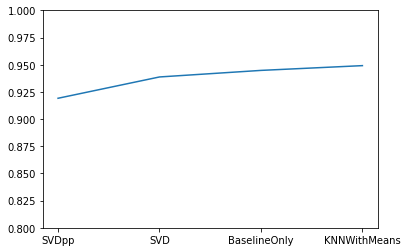

In [10]:
# 결과를 그래프로 표시
import matplotlib.pyplot as plt
index = np.argsort(results)
plt.ylim(0.8, 1)
plt.plot(names[index], results[index])
results[index]

In [13]:
predictions

[Prediction(uid='924', iid='228', r_ui=4.0, est=3.6477975624861, details={'was_impossible': False}),
 Prediction(uid='889', iid='742', r_ui=3.0, est=3.4094882852916766, details={'was_impossible': False}),
 Prediction(uid='220', iid='298', r_ui=4.0, est=4.26256534879342, details={'was_impossible': False}),
 Prediction(uid='332', iid='56', r_ui=5.0, est=4.414326559202703, details={'was_impossible': False}),
 Prediction(uid='806', iid='155', r_ui=3.0, est=3.1175264992838607, details={'was_impossible': False}),
 Prediction(uid='59', iid='507', r_ui=4.0, est=4.279435639716684, details={'was_impossible': False}),
 Prediction(uid='474', iid='510', r_ui=4.0, est=4.543981729749102, details={'was_impossible': False}),
 Prediction(uid='551', iid='127', r_ui=5.0, est=4.792971325309957, details={'was_impossible': False}),
 Prediction(uid='444', iid='306', r_ui=5.0, est=3.9383689447332286, details={'was_impossible': False}),
 Prediction(uid='21', iid='928', r_ui=3.0, est=2.6284634682077046, details=